### Image Enhancement

Image Enhancement is carried out to improve subjective quality of perception and to make the image more suitable for analysis

Different techniques used for enhancement include

1.   Point processing (or) Gray Level Transformation
2.   Mask processing (or) filtering
3.   Histogram Manipulation



#### Point processing (or) Gray Level Transformation
Pixel values in the original image are modified using transformation function. The function can either be linear (or) nonlinear

###### Linear function can be mathematically described as 
s = b * r + c  
Here s -> transformed image
r -> original image 
b and c are constants that affect brightness and contrast of the image


In [0]:
# Transformation Functions are implemented using LookUp Tables

x = list(range(0,256))
lut = []
for i in x:
  lut.append(i+10) # value of b is 1 and c is 10


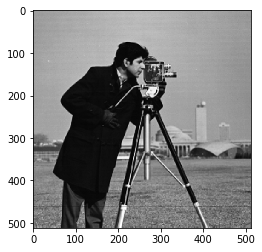

In [15]:
from skimage import data
from matplotlib import pyplot as plt
%matplotlib inline
I = data.camera()
plt.imshow(I,cmap='gray')
plt.show()

In [0]:
import numpy as np
[nRows, nCols] = I.shape
for i in range(nRows):
  for j in range(nCols):
    #print(I[i][j])
    I[i][j] = lut[I[i][j]]

I1 = np.uint8(I)

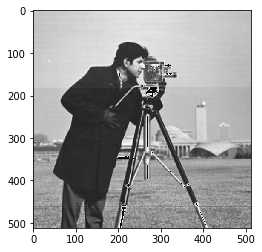

In [24]:
plt.imshow(I1,cmap='gray')# Display Transformed Image
plt.show()

Non - Linear Tranformation provides a non -linear mapping between the pixel intensities of original and transformed image. Two popular non linear transformations include

1.   Logarithmic Transformation
     Useful in adjusting dynamic scale
2.   Power Law transformation
     Can be used to brighten (or) darken the image

Exercise a):

1. Implement logarithmic function and brightness modification on image 'radio.tif' and record the findings. Which function reveals the hidden details in the image and state why? [Use value of C as 255/ log(256)]

2. Use linear Transformation of cameraman image, vary the values of (c,b) as (2,32) (1,-56) and (0.3,0) and provide your inferences

3. It is also possible to enhance particular range of gray values (technique is known as gray level slicing). Implement the following transformation function and apply it to any image.  Pixel Intensities betwee (100,200) is set to 255. Remaining values are undisturbed.

4. Write a generic function to perform gamma transformation. It should accept image and the value of gamma. What happens when gamma is set to value less than 1 and greater than 1?

#### Mask processing (or) Filtering
Pixel values in the original image are modified using a neighborhood defined by a filter. Output pixel is computed as sum of product of pixel values and mask coefficients in pixel neighborhood

In [0]:
from scipy.ndimage.filters import convolve
from skimage.util import random_noise

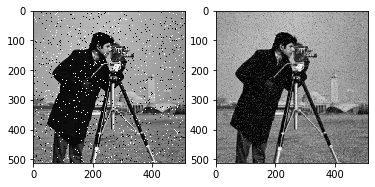

In [37]:
I = data.camera()
I = random_noise(I, mode='s&p',amount=0.05)

k = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]) # Defining filter
I1 = convolve(I, k, mode='constant', cval=0.0)
plt.subplot(121)
plt.imshow(I,cmap='gray')# Display Corrupted
plt.subplot(122)
plt.imshow(I1,cmap='gray')# Display Image after applying mean filter
plt.show()

Exercise b):

1. Use the following filters and visualize its effect on an image
*   [-1 -1 -1; -1 8 -1; -1 -1 -1]
*   [1 2 1; 2 4 2; 1 2 1]
*   [-1 -2 -1; 0 0 0; 1 2 1]

2. Implement High boost filtering (i.e) enhancing edges in an image and also retaining the low level details (Smooth regions in an image) . Use the following mask and find its impact for various values of A 

*   [-1 -1 -1; -1 A+8 -1; -1 -1 -1]





##### Frequency domain filtering

Convolution operation is computationally expensive. In the Transform domain, same operation can be carried out using multiplication.

![alt text](https://www.researchgate.net/profile/Sarah_Ali21/publication/267097158/figure/fig1/AS:295639704457220@1447497406849/Frequency-Domain-Filtering-Operation-9.png)


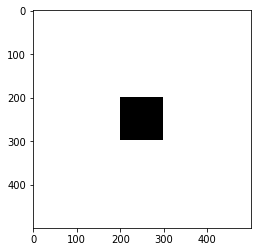

In [56]:
# In standard fourier Transform, Center Coefficients correspond to high frequency and border coefficients correspond to low frequency
# Create a square shaped filter wherein center coefficients are masked
I = np.ones((500,500), dtype=np.uint8)
mid = 249

for i in range(500):
  for j in range(500):
    if (i>249-50 and i<249+50 and j>249-50 and j<249+50):
      I[i][j] = 0;

plt.imshow(I, cmap='gray')
plt.show()

Use the image above , multiply with fourier coefficients and apply inverse fourier transform to the resulting matrix

Exercise c):

1. Modify the filter above wherein its allows coefficients in the center

2. Create a filter which allows coefficients in a circle centered over the image at a radius of 50

3. Create a butterworth low pass filter and indicate the result on an image